<a href="https://colab.research.google.com/github/IndioP/Projeto-AM/blob/main/Avila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 de Aprendizado de Máquina
## Grupo
- João Victor de Lima Peixoto
- José Douglas Pontes Silva
- Marcos Heitor Carvalho de Oliveira
- Mikael Vidal da Silva

# Introdução
O projeto da cadeira de aprendizado de máquina visa aplicar as diferentes técnicas aprendidas na disciplina para fazer uma análise exploratoria sobre a `precisão (precision)`, `cobertura (recall)` e `f1-score` presentes no uso de cada algoritmo estudado em um `dataset` do mundo real.

Os algoritmos aprendidos na cadeira e testados no projeto foram:
- Árvores de Decisões
- Bayesiano Ingenuo
- Regressão Logistica
- K Vizinhos

, onde cada algoritmo apresenta parâmetros e logicas próprias que serão discutidas na fundamentação teórica deste relatório.

O conjunto de dados testado no projeto foi o `Avila Data Set`. Em resumo, esse conjunto de dados foi extraido através de 800 imagens da Biblia de Avila, uma cópia em latim da Biblia produzida no século XII em um local entre a Itália e a Espanha. No capítulo "Conjunto de dados", faremos uma descrição mais ampla de como esse dataset é dividido e também das suas features.

Por fim, mostraremos os resultados e conclusões obtidas dos nossos experimentos.

# Objetivos

O objetivo geral do projeto é explorar os algoritmos aprendidos na cadeira de Aprendizagem de Máquina. Essa objetivo geral engloba os seguintes objetivos especificos:

- I. Explorar o conjunto de dados de `Avila` e verificar as features relevantes para cada método utilizado.
- II. Realizar o treinamento e classificação de cada um dos algoritmos aprendidos utilizando o `Avila Data Set`.
- III. Realizar uma analise exploratoria de mudanças dps hiper-parametros de cada algoritmo para buscar valores melhores de `precision`, `recall` e `f1-score`.

# Fundamentação Teórica

Nesse cápitulo abordaremos alguns dos fundamentos básicos para que o leitor possa entender o projeto. Inicialmente falaremos sobre as métricas usadas para avaliar cada modelo e em seguida falaremos sobre cada modelo em si.

## Métricas

Em geral, quando estamos trabalhando com modelos de classificação, precisamos de algumas métricas para avaliar se a performance de um modelo é melhor do que a de outro modelo ao realizar uma classificação. Nesse contexto, `precision`, `recall` e `f1-score` servem como essas métricas para prover o quão bem um modelo é capaz de prever corretamente a classificação de uma instância com sua classe real. Além disso, essas métricas nos ajudam a comparar diferentes modelos ou parâmetros usados em algum classificador para otimizar sua performance. 

### Precision

A métrica de precisão (ou `precision`) mede a proporção de predições verdadeiras sobre todas as predições positivas feitas pelo modelo. A precisão é calculada como na fórmula abaixo:

<img src="http://www.sciweavers.org/tex2img.php?eq=%20%5Cfrac%7BTP%7D%7BTP%20%2B%20FP%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt=" \frac{TP}{TP + FP} " width="67" height="43" />

, onde `TP` é número de predições positivas enquando `FP` é o número de predições falso-positivas. Uma precisão alta indica que o modelo é bom em indentificar instâncias e tem uma taxa baixa de falso-positivos.

### Recall 

A métrica de cobertura (ou `recall`) mede a proporção de precições verdadeiras sobre todas as instâncias verdadeiramente positivas nos dados. A cobertura é calculada como na fórmula abaixo:

<img src="http://www.sciweavers.org/tex2img.php?eq=%20%5Cfrac%7BTP%7D%7BTP%20%2B%20FN%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt=" \frac{TP}{TP + FN} " width="69" height="43" />

, onde `TP` é número de predições positivas enquando `FN` é o número de predições falso-negativas. Uma cobertura alta indica que o modelo é bom em indentificar todas as intâncias positivas e tem uma taxa baixa de falso-negativos.

### F1-Score

A métrica `f1-score` combina tanto a precisão como a cobertura em uma unica métrica. O `f1-score` pode ser calculada da seguinte forma:

<img src="http://www.sciweavers.org/tex2img.php?eq=%202%20%2A%20%5Cfrac%7Bprecision%20%2A%20recall%7D%7Bprecision%20%2B%20recall%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt=" 2 * \frac{precision * recall}{precision + recall} " width="187" height="47" />

Essa métrica serve para avaliar a performance de um modelo onde ambas precisão e cobertura são desejadas.

## Algoritmos

Dentro do assunto de aprendizado de máquina, os algoritmos que nós aprendemos servem como modelos de classificação. Esses modelos de classificação servem para prever uma classe categorica sobre uma instância de entrada levando em consideração suas `features`, ou parâmetros de entrada.

No caso do projeto, faremos um aprendizado supervisionado, onde usaremos um conjunto de dados já rotulados com a classe correta na entrada para treinar os modelos de classifação. Com isso, os modelos serão capazes de predizer a classe de dados ainda não vistos. 

Existem muitos tipos de modelos de classificação na literatura. Entraremos agora em detalhe sobre os modelos de classificação usados no projeto.

### Decision Tree Classifier

O classificador baseado em árvores de decisão (ou decision tree classifier) é um modelo que faz partições nas features em ramos que correspondem à um espaço que representa especifica classe baseado em um conjunto de regras.

Existem várias formas de se dividir a árvore de decisão. Alguns dos parâmetros que valem a pena ser considerados são: a altura máxima da árvore, a estrátegia de divisão de cada nó da árvore, o críterio de divisão e o número máximo de features usadas. A altura máxima da árvore nos ajuda a decidir quantos critérios iremos considerar no nosso modelo, deixando assim a análise de cada feature mais complexa. Uma árvore curta dará respostas mais facilmente, no entanto, com menos precisão. A estrátegia de divisão do nó nos ajuda a escolher o modo de melhor dividir a árvore, escolhendo métricas que priorizam a qualidade e ganho de informação do sistema. 

### Naive Bayes

Naive Bayes (ou classificador Bayesiano Ingênuo) é um modelo probabilistido que usa o teorema de Bayes para calcular a probabilidade das features da entrada pertencerem ou não à uma determinda classe. 

Dado conjunto de entrada, com um vetor X de features e a classe Y, o modelo primeiro calcula as probabilidades à priori P(Y) para cada class, o que representa a proporção de instancias no conjunto de treinamento que pertencem à cada classe. Em sequencia, o modelo calcula as probabilidades condicionais P(X | Y) para cada feature de entrada em cada classe, o que representa a probabilidade de observar cada valor da feature numa dada classe. Usando o teorema de Bayes, o modelo então calcula a probabiliade à posteriore P(Y | X) de cada classe dada a instância observada, o que indica a probabilidade de cada classe dado o vetor de features, então o modelo simplesmente seleciona a classe com maior probabilidade posteriore.

### Logistic Regression

A regressão logística (ou logistic regression) é um tipo de modelo de classificação linear utilizado comumente em problemas de classificação binária, onde o objetivo é prever um dos dois possíveis resultados com base em características de entrada. O modelo é chamado de "logístico" porque usa a função logística (também conhecida como função sigmoidal) para mapear a saída de uma função linear para um valor de probabilidade entre 0 e 1. No entanto, o modelo também pode ser usado para problemas com multiplas classes, onde a função logistica irá funcionar de maneira semelhante, mas agora calculando a probabilidade do vetor de entrada pertencer à uma das multiplas classes possíveis.


Dado um conjunto de dados de treinamento com características de entrada X e rótulos de classe binários Y, o modelo primeiro aprender uma função que mapeia as características de entrada para um valor de saída continuo. Essa função linear pode ser expressa como:

```
    z = b0 + b1x1 + b2x2 + ... + bnxn
```

, onde z é a função linear das características de entrada, `b0` é o termo de viés e cada `b_x` com `x` indo de `1` à  `n` são os coeficientes (ou pesos) que correspondem a cada feature da entrada. A saída da função linear é então passada pela função logística, que mapeia a saída para um valor de probabilidade entre 0 e 1. O modelo então usa o valor de probabilidade para tomar uma decisão de classificação. 

O modelo é treinado pela minimização de uma função de custo que mede o erro entre as probabilidades previstas e os rótulos de classe verdadeiros. Uma função de custo comumente usada para regressão logística é a função de perda de entropia cruzada binária.

### K-Neighbors

O K neighbors (ou K-Vizinhos, ou até mesmo K-nearest neighbors: KNN) é um tipo de modelo de classificação não paramétrico e baseado em suas instâncias. O KNN são faz suposições sobre as distribuições dos dados e pode trabalhar com features categoricas ou númericas. No KNN, a classificação é feita com base nos rótulos de classe dos k vizinhos mais próximos no espaço de características. No entanto, o valor de seu hiperparâmetro `k` deve ser escolhido com base no problema específico e nas características dos dados.

Dado uma nova instância para classificar, o modelo KNN calcula as distâncias entre a nova instância e todas as instâncias no conjunto de treinamento. Essa função de distância depende do problema selecionado. O KNN seleciona as k instâncias mais próximas da nova instância de entrada baseado na função escolhida e, assim, atribui a nova instância à classe que é mais frequente entre esses k vizinhos.

Uma das desvantagens do KNN é que pode ser computacionalmente caro para conjuntos de dados grandes, pois requer o cálculo das distâncias entre a nova instância e todas as instâncias no conjunto de treinamento. Além disso, KNN pode não funcionar bem em espaços de características de alta dimensão ou quando os dados são esparsos.

# Conjunto de Dados

Os dados do projeto são referentes as informações extraidas das imagens de páginas copiadas da biblía de `Avila`. A analise paleografica do manuscrito indicou a presença de 12 escrivãos responsáveis pela copia. A quantidade de páginas escritas por cada escrivão não é igual. Cada classe do `dataset` está dividida entre os tipos: A, B, C, D, E, F, G, H, I, W, X, e Y, onde cada classe faz referência à qual copiador foi responsável por aquele trecho / página.

Cada padrão de escrivão contém 10 features. Os dados foram normalizados usando o `Z-normalization` método. Essa normalização é uma técnica usada para transformar um conjunto de características de entrada para ter uma média zero e um desvio padrão de um. Isso é feito subtraindo o valor médio de cada característica de cada ponto de dados e, em seguida, dividindo pelo desvio padrão dessa característica. A normalização Z é comumente usada em aprendizado de máquina para garantir que todas as características de entrada estejam na mesma escala e tenham uma faixa de valores semelhante. Isso é particularmente importante para modelos que dependem de métricas baseadas em distância ou algoritmos de otimização, pois características com escalas ou variâncias maiores podem dominar o processo de tomada de decisão do modelo. A normalização Z pode ajudar a evitar esse problema e garantir que todas as características sejam igualmente importantes nas previsões do modelo.

O `dataset` foi dividido em duas partes, uma parte para treino, contendo 10430 amostras e outra parte para os testes, contendo 10437 amostras.

# Metodologia

A metodologia utilizada neste projeto foi dividida em três etapas principais:
- 1. Realizamos o treinamento e classificação utilizando os valores default dos respectivos métodos para obter o valor primordial do `precision`, `recall`
 e `f1_score` em cada um dos modelos propostos. 
- 2. Realizamos uma analise exploratória em cada um dos hiperparâmetros para buscar otimizar os valores da métricas obtidas.
- 3. Por fim, utilizamos o Optuna, uma ferramenta que automatiza o processo de testagem de hiperparâmetros, para os modelos que tinham uma variação maior de parâmetros. 


Para cada modelo de classificação diferente, alteramos os parâmetros que mais influenciavam na nossa classificação. 

No caso do Decision Tree Classifier alteramos altura máxima da árvore, a estrátegia de divisão de cada nó da árvore, o critério de divisão e o número máximo de features usadas. A altura máxima tenta regular o feedback da resposta, equanto a estrátegia de divisão de cada nó diz como separar os nós baseado em suas features e critério de divisão. 

No Naive Bayes Classifier, alteramos o parâmetro que regula a porção da maior variância de todas as características que é adicionada às variâncias para garantir a estabilidade dos cálculos. Apenas esse parâmetro é usado para a construção do modelo e foi o unico variado.

No Logic Regression Classifier, alteramos os parâmetros de tolerância, penalidade, a função de regulação e o coeficiente de força de regulação. Cada parâmetro influência no calculo final do modelo, seja nas subdivisões espaciais para a entrada da classe ou como o modelo se comportará com entradas de pequena ordem.

Por fim, no KNN Classifier, testamos diferentes valores de `k` para o classificador e também a influência de que outras funções de distância faziam na composição do classificador.

A escolha de todos os hiperparâmetros foram feitos utilizando como o base `f1_score` em cima do conjunto de validação. Todos os testes foram utilizados usando a biblioteca do `sklearn` que disponibiliza todos esses classificadores e parâmetros estudados, além disso utilizamos o `dataset` do `Avila` em ambos os testes comentados.

# Resultados


## Import's iniciais do projeto

In [1]:
!git clone https://github.com/IndioP/Projeto-AM

Cloning into 'Projeto-AM'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 59 (delta 31), reused 14 (delta 7), pack-reused 0
Unpacking objects: 100% (59/59), 778.18 KiB | 2.20 MiB/s, done.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,recall_score,precision_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

In [11]:
def display_metrics(model,x_test,y_test):
    predicted = model.predict(x_test)
    report = classification_report(y_test, predicted)
    accuracy = accuracy_score(y_test, predicted)
    print(report)
    print(f"accuracy: {accuracy}")

    cm = confusion_matrix(y_test, predicted)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, center=True, annot=True, yticklabels=model.classes_, xticklabels=model.classes_)


In [3]:
names = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']
df = pd.read_csv("Projeto-AM/avila-tr.txt",names = names)
df_ts = pd.read_csv("Projeto-AM/avila-ts.txt",names=names)
X_test = df_ts.drop("Class",axis=1)
y_test = df_ts["Class"]

## Observando o conjunto de dados

In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


## Separando o conjunto de treinamento em TREINO 80% | VALIDAÇÃO 20%

In [5]:
X_train,X_valid,y_train,y_valid = train_test_split(df.drop("Class",axis=1), df["Class"],test_size=0.2,random_state=2023)

In [6]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((8344, 10), (8344,), (2086, 10), (2086,))

## Primeira análise dos modelos com valores default's dos métodos utilizados pelo Scikit Learn para cada um dos classificadores:
- Decisition Tree
- Gaussian NB
- LOgistic Regression
- KNN

In [7]:
models = [DecisionTreeClassifier(), GaussianNB(), Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000))]), KNeighborsClassifier()]
models_names = ["DecisionTreeClassifier", "GaussianNB", "LogisticRegression", "KNeighborsClassifier"]

In [8]:
for model,name in zip(models,models_names):
  print(f'\nModel: ',name)
  clf = model
  clf.fit(X_train,y_train)
  
  print("Accuracy: ",clf.score(X_valid,y_valid))
  
  pred = clf.predict(X_valid)
  print("Precision: ",precision_score(pred,y_valid,average="weighted"))
  print("Recall: ",recall_score(pred,y_valid,average="weighted"))
  print("F1-score: ",f1_score(pred,y_valid,average="weighted"))
  print("-"*100)


Model:  DecisionTreeClassifier
Accuracy:  0.9755512943432406
Precision:  0.9756802227477329
Recall:  0.9755512943432406
F1-score:  0.9755513504533896
----------------------------------------------------------------------------------------------------

Model:  GaussianNB
Accuracy:  0.28044103547459254
Precision:  0.4869461008434287
Recall:  0.28044103547459254
F1-score:  0.31269471946758487
----------------------------------------------------------------------------------------------------

Model:  LogisticRegression
Accuracy:  0.5522531160115053
Precision:  0.8055085318695356
Recall:  0.5522531160115053
F1-score:  0.631349791534737
----------------------------------------------------------------------------------------------------

Model:  KNeighborsClassifier


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7157238734419943
Precision:  0.7428505624498204
Recall:  0.7157238734419943
F1-score:  0.7225385508602775
----------------------------------------------------------------------------------------------------


In [10]:
def check_test(clf,X_test,y_test):
  pred = clf.predict(X_test)
  print("Precision: ",precision_score(pred,y_test,average="weighted"))
  print("Recall: ",recall_score(pred,y_test,average="weighted"))
  print("F1-score: ",f1_score(pred,y_test,average="weighted"))
  print("-"*100)

check_test(clf,X_test,y_test)

Precision:  0.7552854027850691
Recall:  0.7311487975471879
F1-score:  0.7369839317135863
----------------------------------------------------------------------------------------------------


De início já podemos observar que, utilizando apenas os valores defaults de cada um dos classificadores, o DecisionTreeClassifier apresenta um melhor comportamento em relação à todas as métricas do que nos outros classificadores. Esse comportamento se deve ao fato de que as árvores de decisão tomam vantagem sobre a divisão das features para classificar o espaço de escrita de cada escrivão, tendo assim uma vantagem natural na classificação pela própria natureza dos dados.


## DecisionTreeClassifier parameters

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       850
           B       1.00      1.00      1.00         2
           C       0.96      1.00      0.98        26
           D       0.97      1.00      0.99        69
           E       0.97      0.95      0.96       231
           F       0.98      1.00      0.99       379
           G       1.00      0.97      0.98        89
           H       0.98      0.97      0.98       112
           I       1.00      0.99      1.00       180
           W       1.00      0.88      0.93         8
           X       0.93      0.92      0.93        92
           Y       0.86      0.92      0.89        48

    accuracy                           0.98      2086
   macro avg       0.97      0.97      0.97      2086
weighted avg       0.98      0.98      0.98      2086

accuracy: 0.9793863854266539


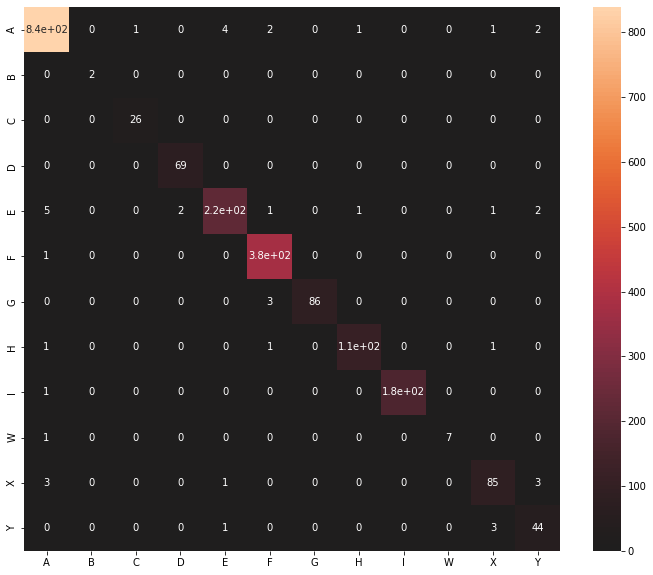

In [18]:
display_metrics(clf, X_valid, y_valid)

## De que formas poderiamos melhorar o atual modelo?

Primeiro começamos fazendo uma avaliação geral e mudando alguns hiperparametros para observar a variação de resultado da árvore. Para isso 
variamos cada um dos parâmetros comentados na métodologia e o resultados pode ser visto nas imagens abaixo:


              precision    recall  f1-score   support

           A       0.90      0.96      0.93       850
           B       1.00      1.00      1.00         2
           C       1.00      0.77      0.87        26
           D       0.77      0.83      0.80        69
           E       0.92      0.83      0.87       231
           F       0.91      0.90      0.91       379
           G       0.92      0.79      0.85        89
           H       0.96      0.87      0.91       112
           I       0.99      0.99      0.99       180
           W       1.00      0.88      0.93         8
           X       0.92      0.87      0.89        92
           Y       0.83      0.92      0.87        48

    accuracy                           0.91      2086
   macro avg       0.93      0.88      0.90      2086
weighted avg       0.91      0.91      0.91      2086

accuracy: 0.9132310642377757


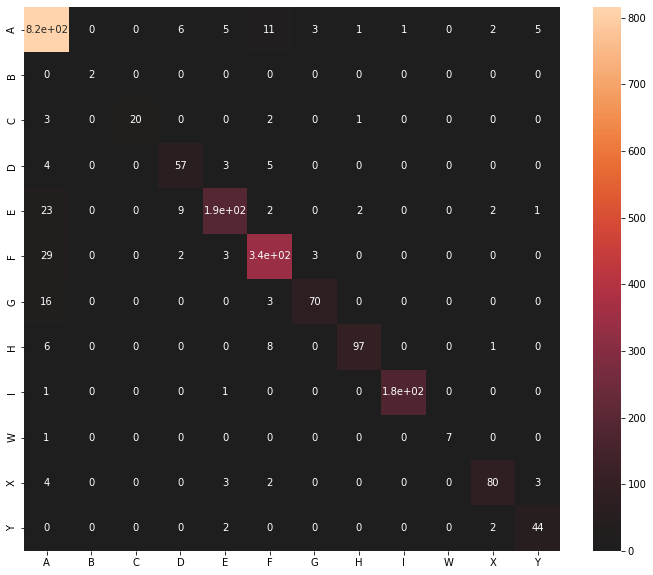

In [19]:
clf_best = DecisionTreeClassifier(max_depth=12)
clf_best.fit(X_train, y_train)
display_metrics(clf_best, X_valid, y_valid)

Alterando apenas a altura máxima da árvore (max_depth), observamos que o valor geral das métricas do nosso modelo diminui. O que indica que apenas podar a árvore para ter uma resposta mais rápido não influência tanto na qualidade do modelo.
 

              precision    recall  f1-score   support

           A       0.82      0.83      0.83       850
           B       1.00      0.50      0.67         2
           C       0.58      0.42      0.49        26
           D       0.54      0.57      0.55        69
           E       0.76      0.75      0.76       231
           F       0.73      0.69      0.71       379
           G       0.63      0.64      0.63        89
           H       0.66      0.71      0.69       112
           I       0.96      0.97      0.96       180
           W       0.86      0.75      0.80         8
           X       0.92      0.89      0.91        92
           Y       0.86      0.92      0.89        48

    accuracy                           0.79      2086
   macro avg       0.78      0.72      0.74      2086
weighted avg       0.79      0.79      0.79      2086

accuracy: 0.7857142857142857


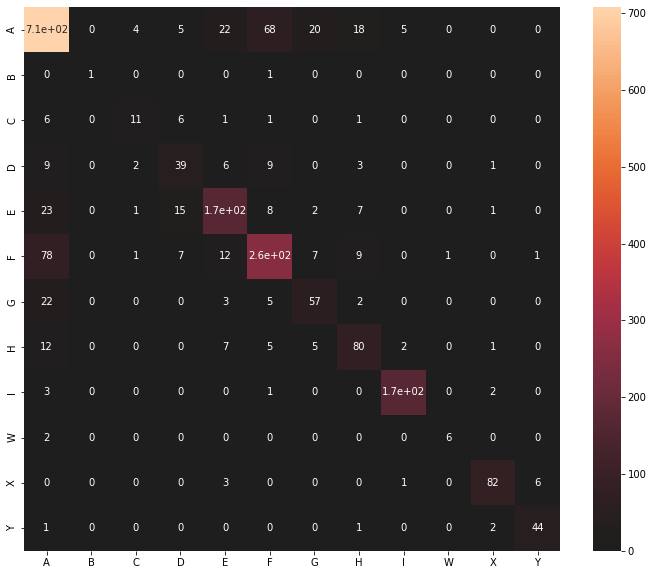

In [20]:
clf_best = DecisionTreeClassifier(splitter="random")
clf_best.fit(X_train, y_train)
display_metrics(clf_best, X_valid, y_valid)

Ao alteramos a estrátegia de divisão de cada nó da árvore (splitter), podemos ver que uma divisão randomica dos dados para gerar os nós da árvore diminui bastante cada uma das métricas do sistema, gerando assim um modelo que seja 20% menos eficiente do que nosso modelo básico.  

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       850
           B       1.00      0.50      0.67         2
           C       1.00      0.85      0.92        26
           D       1.00      0.97      0.99        69
           E       0.99      0.97      0.98       231
           F       0.99      0.99      0.99       379
           G       0.97      0.98      0.97        89
           H       0.96      0.96      0.96       112
           I       1.00      0.99      1.00       180
           W       0.86      0.75      0.80         8
           X       0.98      0.97      0.97        92
           Y       0.92      1.00      0.96        48

    accuracy                           0.98      2086
   macro avg       0.97      0.91      0.93      2086
weighted avg       0.98      0.98      0.98      2086

accuracy: 0.9846596356663471


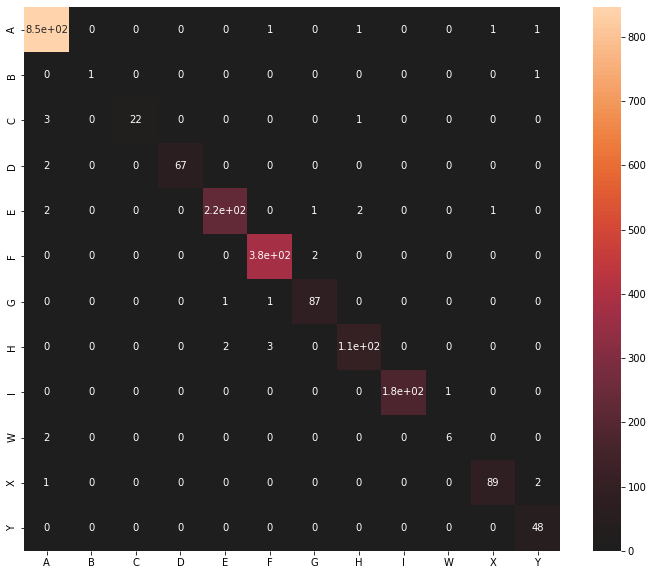

In [21]:
clf_best = DecisionTreeClassifier(criterion="entropy")
clf_best.fit(X_train, y_train)
display_metrics(clf_best, X_valid, y_valid)

Ao alterarmos o critério de divisão (criterion) do nosso modelo podemos observar que o críterio que prioriza a entropia otimiza um pouco mais nossas métricas, visto que ao priorizar a entropia do sistema criamos uma árvore que valoriza mais as features do nosso problema.

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       850
           B       1.00      0.50      0.67         2
           C       1.00      0.88      0.94        26
           D       0.99      0.99      0.99        69
           E       0.98      0.97      0.98       231
           F       0.99      0.99      0.99       379
           G       0.98      0.98      0.98        89
           H       0.97      0.96      0.96       112
           I       1.00      1.00      1.00       180
           W       1.00      0.88      0.93         8
           X       0.98      0.96      0.97        92
           Y       0.94      1.00      0.97        48

    accuracy                           0.99      2086
   macro avg       0.98      0.92      0.95      2086
weighted avg       0.99      0.99      0.99      2086

accuracy: 0.986097794822627


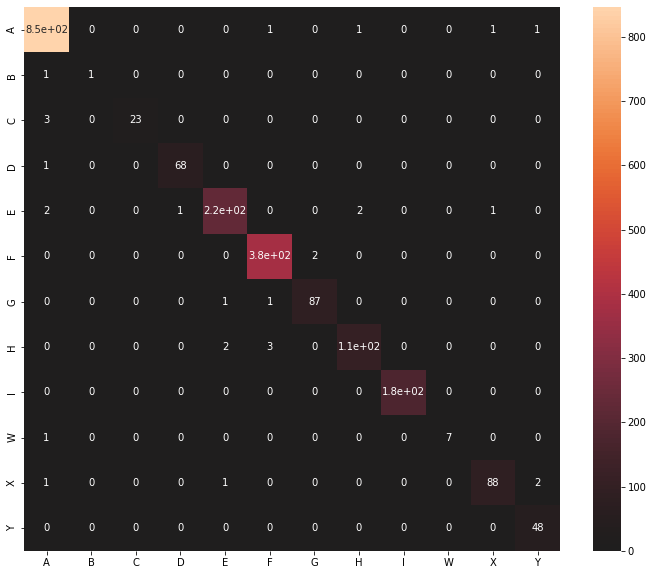

In [27]:
clf_best = DecisionTreeClassifier(criterion="log_loss")
clf_best.fit(X_train, y_train)
display_metrics(clf_best, X_valid, y_valid)

Também temos uma melhora quando utilizamos o método de `log_loss` também temos uma otimização por não gerarmos uma árvore de qualquer maneira e sim uma que prioriza nosso granho de informação.


              precision    recall  f1-score   support

           A       0.95      0.94      0.95       850
           B       1.00      1.00      1.00         2
           C       0.91      0.81      0.86        26
           D       0.83      0.87      0.85        69
           E       0.87      0.87      0.87       231
           F       0.94      0.95      0.95       379
           G       0.90      0.92      0.91        89
           H       0.86      0.91      0.89       112
           I       0.99      0.99      0.99       180
           W       0.70      0.88      0.78         8
           X       0.92      0.88      0.90        92
           Y       0.89      0.83      0.86        48

    accuracy                           0.93      2086
   macro avg       0.90      0.91      0.90      2086
weighted avg       0.93      0.93      0.93      2086

accuracy: 0.9295302013422819


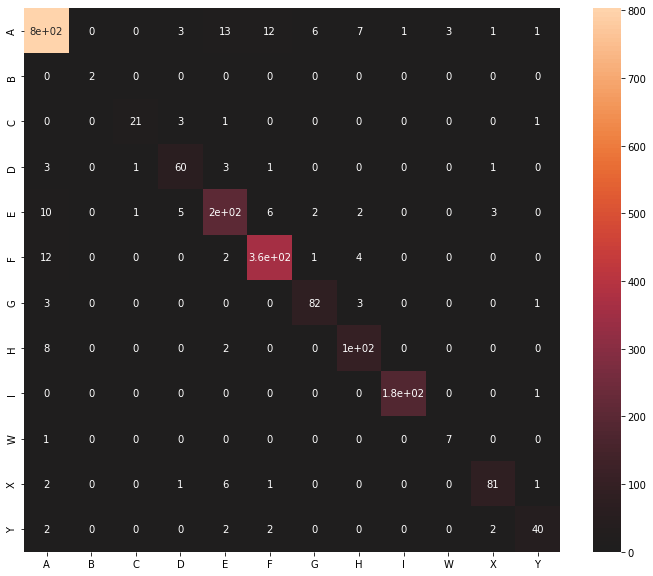

In [28]:
clf_best = DecisionTreeClassifier(max_features="sqrt")
clf_best.fit(X_train, y_train)
display_metrics(clf_best, X_valid, y_valid)

              precision    recall  f1-score   support

           A       0.97      0.97      0.97       850
           B       1.00      1.00      1.00         2
           C       1.00      0.88      0.94        26
           D       0.97      0.97      0.97        69
           E       0.96      0.94      0.95       231
           F       0.94      0.97      0.95       379
           G       0.95      0.94      0.95        89
           H       0.95      0.91      0.93       112
           I       0.98      1.00      0.99       180
           W       1.00      0.88      0.93         8
           X       0.94      0.97      0.95        92
           Y       0.98      0.96      0.97        48

    accuracy                           0.96      2086
   macro avg       0.97      0.95      0.96      2086
weighted avg       0.96      0.96      0.96      2086

accuracy: 0.964046021093001


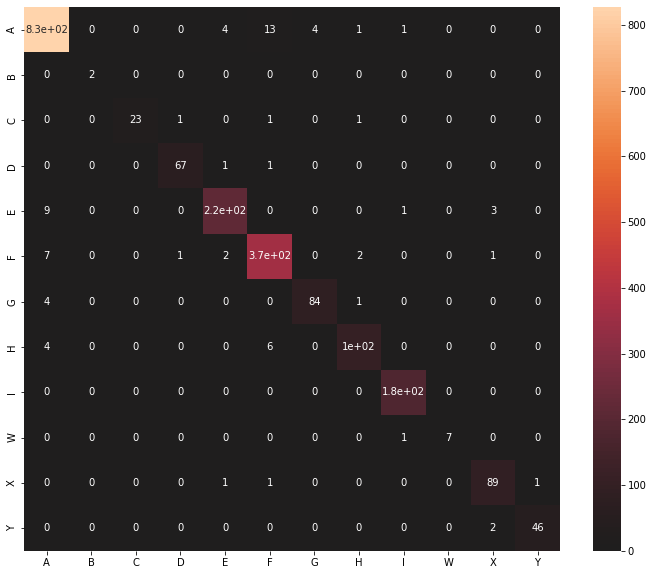

In [29]:
clf_best = DecisionTreeClassifier(max_features="log2")
clf_best.fit(X_train, y_train)
display_metrics(clf_best, X_valid, y_valid)

Ao alterarmos o número máximo de features usadas (max_features), podemos ver que ao considerarmos um número menor de features do que os usados antes, nossas métricas tem um desempenho pior. Isso se deve ao fato de que as features tem uma importância consideravel ao processo de classificação. Ao removermos essas informações, perdemos precisão.

## Melhor combinação de hiperparametros no testes realizados

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       850
           B       1.00      0.50      0.67         2
           C       1.00      0.85      0.92        26
           D       0.99      1.00      0.99        69
           E       0.97      0.97      0.97       231
           F       0.99      0.99      0.99       379
           G       0.97      0.98      0.97        89
           H       0.96      0.96      0.96       112
           I       1.00      1.00      1.00       180
           W       1.00      0.88      0.93         8
           X       0.98      0.96      0.97        92
           Y       0.94      1.00      0.97        48

    accuracy                           0.99      2086
   macro avg       0.98      0.92      0.94      2086
weighted avg       0.99      0.99      0.98      2086

accuracy: 0.9851390220517737


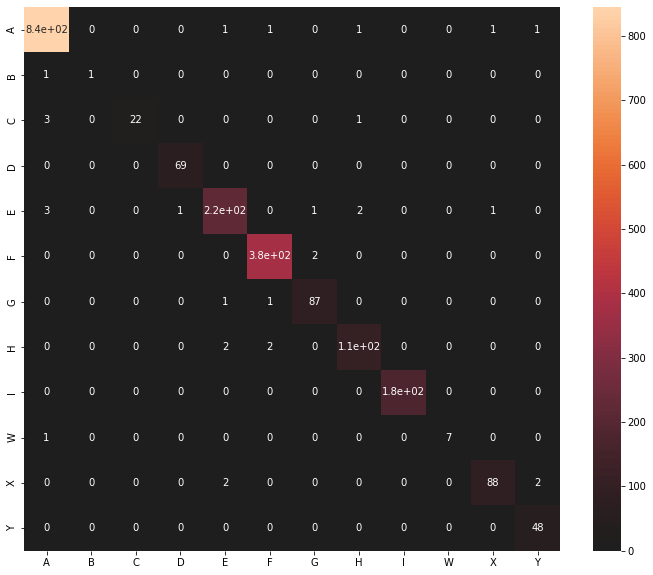

In [31]:
clf_best = DecisionTreeClassifier(max_depth=20, criterion="entropy")
clf_best.fit(X_train, y_train)
display_metrics(clf_best, X_valid, y_valid)

No processo final, podemos observar que ao combinarmos melhor a quantidade de parâmetros usadas pelo modelo, podemos obter uma melhora no sistema de classificação devido à analise feita anteriormente nos parâmetros.

## Uma outra maneira de tentar modificar os hiperparametros é utilizando-se de uma ferramenta chamada de Optuna, que ajuda a definirmos alguns hiperparametros nos quais ele irá testar automaticamente

In [32]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.6 MB/s eta 0:00:00


In [ ]:
criterion = "entropy" #What is the criterion used for the split
#There is an scientific paper comparing gini and entropy and they diverge in only 2% of the cases, but entropy is a little slower because of logarithm

splitter = "best" #The strategy used to choose the split at each node
#If the model is suffering from overfitting we can change it to random, to avoid this fate

max_depth = 20 #can be None to go forever till purity beeing achieved

min_samples_split = 2 #if int, it is the minimal number to make a split
                      #if float, it is the min_samples_split * n_samples

min_samples_leaf = 1 #int, float

#min_weight_fraction_leaf = 

max_features = None #there are few features, so I think

In [ ]:
!pip install optuna

In [ ]:
from sklearn.utils.extmath import weighted_mode
import optuna



def objective(trial):
    min_samples_split = trial.suggest_int("min_samples_split",2,50)
    min_samples_leaf = trial.suggest_int("min_samples_leaf",1,30)
    
    clf = DecisionTreeClassifier(
                                #criterion=criterion,
                                #splitter=splitter,
                                min_samples_split=min_samples_split,
                                #max_depth=max_depth, 
                                #min_samples_leaf=min_samples_leaf, 
                                max_features=max_features
                                )
    clf.fit(X_train,y_train)
    pred = clf.predict(X_valid)
    return f1_score(pred,y_valid,average="weighted")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)

[I 2023-03-05 14:42:31,615] A new study created in memory with name: no-name-a759c063-2c38-436e-bee5-47d53eecddad
[I 2023-03-05 14:42:31,707] Trial 0 finished with value: 0.8841244291729367 and parameters: {'min_samples_split': 39, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8841244291729367.
[I 2023-03-05 14:42:31,803] Trial 1 finished with value: 0.9170424581061433 and parameters: {'min_samples_split': 25, 'min_samples_leaf': 27}. Best is trial 1 with value: 0.9170424581061433.
[I 2023-03-05 14:42:31,900] Trial 2 finished with value: 0.9471279855591596 and parameters: {'min_samples_split': 15, 'min_samples_leaf': 22}. Best is trial 2 with value: 0.9471279855591596.
[I 2023-03-05 14:42:32,020] Trial 3 finished with value: 0.9503280310832801 and parameters: {'min_samples_split': 13, 'min_samples_leaf': 26}. Best is trial 3 with value: 0.9503280310832801.
[I 2023-03-05 14:42:32,180] Trial 4 finished with value: 0.8536972179229775 and parameters: {'min_samples_split': 48, 'min

{'min_samples_split': 2, 'min_samples_leaf': 1}


Os melhores valores encontrados e sugeridos pelo optuna são: - {'min_samples_split': 2, 'min_samples_leaf': 1}


In [33]:
clf_optuna_best = DecisionTreeClassifier(max_depth = 20, criterion="entropy",min_samples_split=2, min_samples_leaf=1)
clf_optuna_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       850
           B       1.00      0.50      0.67         2
           C       1.00      0.85      0.92        26
           D       0.97      1.00      0.99        69
           E       0.99      0.96      0.97       231
           F       0.99      1.00      0.99       379
           G       0.99      0.98      0.98        89
           H       0.96      0.96      0.96       112
           I       0.99      1.00      1.00       180
           W       1.00      0.75      0.86         8
           X       0.98      0.97      0.97        92
           Y       0.94      1.00      0.97        48

    accuracy                           0.99      2086
   macro avg       0.98      0.91      0.94      2086
weighted avg       0.99      0.99      0.99      2086

accuracy: 0.9856184084372004


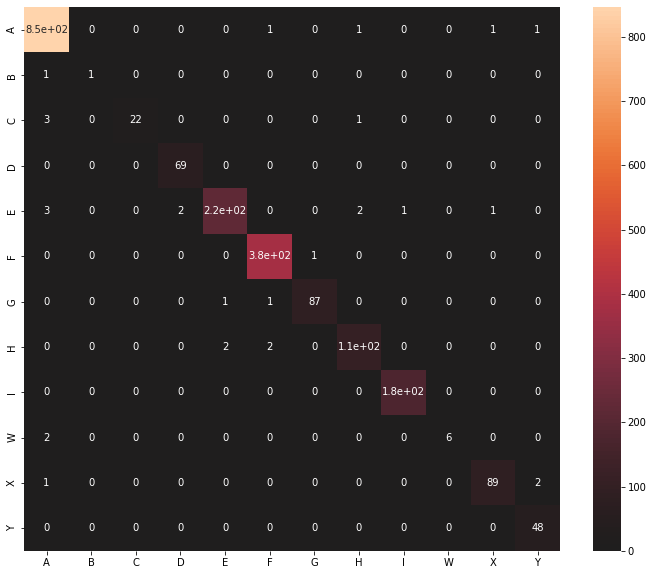

In [34]:
display_metrics(clf_optuna_best,X_valid,y_valid)

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      4286
           B       1.00      1.00      1.00         5
           C       0.96      0.94      0.95       103
           D       0.97      0.97      0.97       353
           E       0.97      0.97      0.97      1095
           F       0.99      0.99      0.99      1962
           G       1.00      0.96      0.98       447
           H       0.97      0.98      0.98       520
           I       1.00      1.00      1.00       832
           W       0.95      0.93      0.94        45
           X       0.95      0.96      0.95       522
           Y       0.96      0.99      0.97       267

    accuracy                           0.99     10437
   macro avg       0.98      0.97      0.98     10437
weighted avg       0.99      0.99      0.99     10437

accuracy: 0.9852448021462106


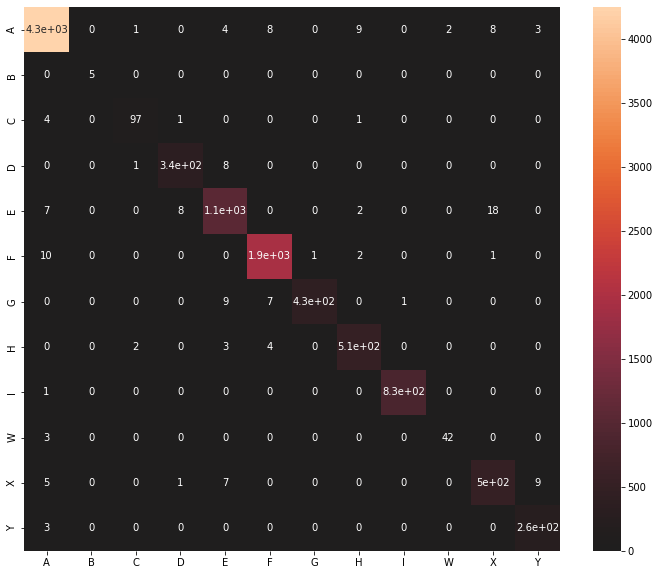

In [35]:
display_metrics(clf_optuna_best,X_test,y_test)

Podemos observar que, ao usarmos o optuna, conseguimos otimizar ainda um pouco mais os parâmetros devido a busca pela melhor configuração dos parâmetros extras.

# Naive Bayes

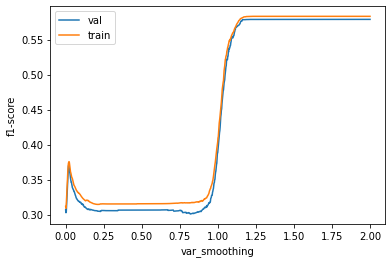

In [36]:
import numpy as np
import matplotlib.pyplot as plt

results_val = []
results_train = []
x = np.linspace(1e-3,2,1000) #unico parametro que parece ser relevante????
for i in x:
  clf = GaussianNB(var_smoothing = i)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

plt.plot(x,results_val,label='val')
plt.plot(x,results_train,label='train')
plt.ylabel("f1-score")
plt.xlabel("var_smoothing")
plt.legend()

Com o Naive Bayes, variamos o valor do smoothing e plotamos quais os valores da métrica de `f1_score` para cada valor testado. Pelo gráfico acima podemos observar que com um `var_smoothing` de aproximadamente 1.225 nós estabilizamos o `f1_score` do nosso modelo e deixamos ele mais otimizado.

In [37]:
clf = GaussianNB(var_smoothing = 1.225)
clf.fit(X_train,y_train)
print("acuracia =",clf.score(X_valid,y_valid))

pred = clf.predict(X_valid)
print("f1",f1_score(pred,y_valid,average="weighted"))
print("recall",recall_score(pred,y_valid,average="weighted"))
print("precision",precision_score(pred,y_valid,average="weighted"))
print("-"*100)

acuracia = 0.4074784276126558
f1 0.5790190735694823
recall 0.4074784276126558
precision 1.0
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
check_test(clf,X_test,y_test)

Precision:  0.9997128540868042
Recall:  0.410846028552266
F1-score:  0.5821701553337219
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Podemos verificar no grafico acima, que com o valor alterado do `var_smoothing` nós conseguimos um valor maior das nossas métricas do que apenas deixando na configuração default, otimizando assim nosso modelo.

## LogisticRegression



In [39]:
def make_df_metrics(methods,results_train,results_val):
  return pd.concat([pd.DataFrame({"x":methods,'y':results_train,'label':['train']*len(results_train)}),pd.DataFrame({"x":methods,'y':results_val,'label':['val']*len(results_val)})])


### Check penalty

In [40]:

results_val = []
results_train = []
penalties = ['l1','l2',None]
for penalty in penalties:
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(penalty=penalty,solver='saga',max_iter=10000))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

for l1_ratio in np.linspace(0.1,1.0,10):
  penalties.append(f"elasticnet_{l1_ratio}")
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=l1_ratio,max_iter=10000))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

df_metrics = make_df_metrics(penalties,results_train,results_val)

(0.58, 0.66)

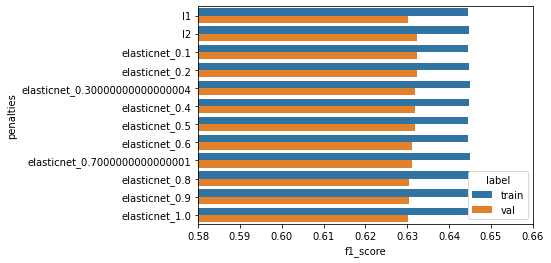

In [41]:
sns.barplot(data=df_metrics,y='x',x='y',hue='label')
plt.ylabel("penalties")
plt.xlabel("f1_score")
plt.xlim(0.58, 0.66)

In [42]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(2)

,x,y,label
2,None,0.645557,train
9,elasticnet_0.7000000000000001,0.645010,train
1,l2,0.632305,val
3,elasticnet_0.1,0.632305,val


### Check solver

In [43]:
results_val = []
results_train = []
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
for solver in solvers:
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(solver = solver,max_iter=10000,random_state=42))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

df_metrics = make_df_metrics(solvers,results_train,results_val)

(0.62, 0.66)

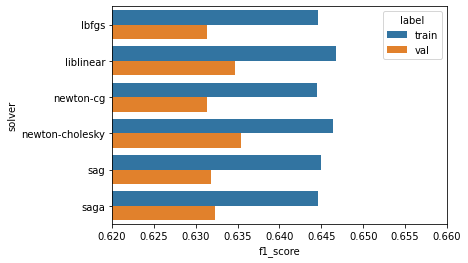

In [44]:
sns.barplot(data=df_metrics,y='x',x='y',hue='label')
plt.ylabel("solver")
plt.xlabel("f1_score")
plt.xlim(0.62, 0.66)

In [45]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(2)

,x,y,label
1,liblinear,0.646720,train
3,newton-cholesky,0.646420,train
3,newton-cholesky,0.635404,val
1,liblinear,0.634668,val


In [46]:
def plot_line(x,results_val,results_train,xlabel):
  plt.title("testing for "+xlabel)
  plt.plot(Cs,results_val,label='val')
  plt.plot(Cs,results_train,label='train')
  plt.ylabel("f1-score")
  plt.xlabel(xlabel)
  plt.legend()

### Check C

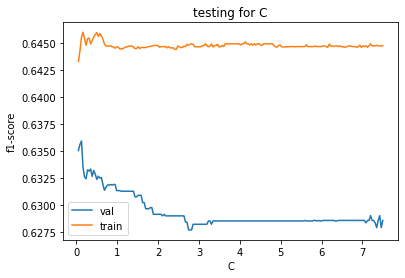

In [47]:
results_val = []
results_train = []
Cs = np.linspace(0.05,7.5,200)
for C in Cs:
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000,C=C))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

df_metrics = make_df_metrics(Cs,results_train,results_val)

plot_line(Cs,results_val,results_train,"C")


In [48]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(2)

,x,y,label
3,0.162312,0.645993,train
12,0.499246,0.645962,train
2,0.124874,0.635943,val
1,0.087437,0.635612,val


### Check tol

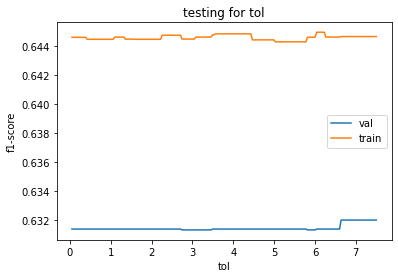

In [49]:
results_val = []
results_train = []
tols = np.linspace(0.00001,1.0,200)
for tol in tols:
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000,tol=tol))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))
    
df_metrics = make_df_metrics(tols,results_train,results_val)

plot_line(tols,results_val,results_train,"tol")

In [50]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(2)

,x,y,label
164,0.824122,0.644970,train
163,0.819097,0.644970,train
188,0.944724,0.631973,val
178,0.894473,0.631973,val


In [51]:
clf =  Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(penalty='l2',solver='newton-cholesky',C=0.12,tol=5.5,max_iter=10000))])
clf.fit(X_train,y_train)
pred = clf.predict(X_valid)
print("f1_val",f1_score(pred,y_valid,average="weighted"))
pred = clf.predict(X_train)
print("f1_train",f1_score(pred,y_train,average="weighted"))


f1_val 0.630486257692258
f1_train 0.6294553093819075


In [52]:
check_test(clf,X_test,y_test)

Precision:  0.9295033156936094
Recall:  0.4789690524096963
F1-score:  0.6232209067693982
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.extmath import weighted_mode
import matplotlib.pyplot as plt
import numpy as np
import optuna

## KNN parameters

#n_neighbors int, default=5
#weights {‘uniform’, ‘distance’}, callable or None, default=’uniform’
#algorithm {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
#leaf_size int, default=30
#p int, default=2
#metric str or callable, default=’minkowski’


In [55]:
def check_f1_test(clf,X_test,y_test):
  pred = clf.predict(X_test)
  print("f1",f1_score(pred,y_test,average="weighted"))
  print("recall",recall_score(pred,y_test,average="weighted"))
  print("precision",precision_score(pred,y_test,average="weighted"))

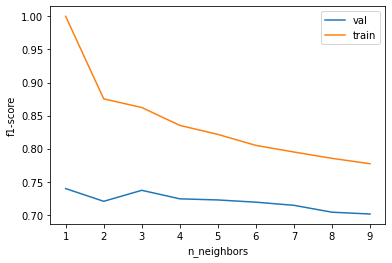

In [56]:
results_val = []
results_train = []
n_s = range(1,10)
for n_neighbors in n_s:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

plt.plot(n_s,results_val,label='val')
plt.plot(n_s,results_train,label='train')
plt.ylabel("f1-score")
plt.xlabel("n_neighbors")
plt.legend()

**Obs: como podemos constatar na documentação do sklearn, a metrica default é minkowski, mas como p default é 2 ela é equivalente a metrica euclidean**

In [57]:
def make_df_metrics(methods,results_train,results_val):
  return pd.concat([pd.DataFrame({"x":methods,'y':results_train,'label':['train']*len(results_train)}),pd.DataFrame({"x":methods,'y':results_val,'label':['val']*len(results_val)})])


In [58]:
results_val = []
results_train = []
metrics = ['cityblock','cosine','euclidean','l1','l2','manhattan','nan_euclidean']
#'haversine'
for x in metrics:
  clf = KNeighborsClassifier(metric = x)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))
  
for x in range(3,8):
  metrics.append(f'minkowski_p{x}')
  clf = KNeighborsClassifier(metric = 'minkowski',p=x)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

df_metrics = make_df_metrics(metrics,results_train,results_val)

(0.6, 1.0)

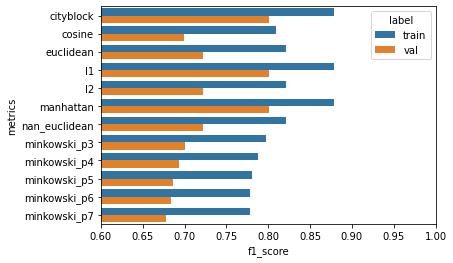

In [59]:
sns.barplot(data=df_metrics,y='x',x='y',hue='label')
plt.ylabel("metrics")
plt.xlabel("f1_score")
plt.xlim(0.6, 1.0)

In [60]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(4)

,x,y,label
0,cityblock,0.878461,train
3,l1,0.878461,train
5,manhattan,0.878461,train
2,euclidean,0.821596,train
5,manhattan,0.800712,val
3,l1,0.800712,val
0,cityblock,0.800712,val
2,euclidean,0.722539,val


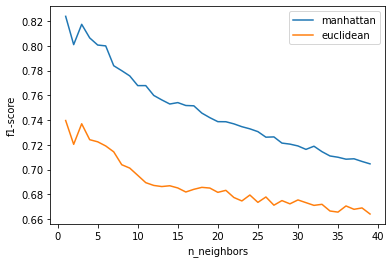

In [61]:
manhattan_val = []
euclidean_val = []


n_s = range(1,40)
for n_neighbors in n_s:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors,metric='manhattan')
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  manhattan_val.append(f1_score(pred,y_valid,average="weighted"))

for n_neighbors in n_s:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors,metric='euclidean')
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  euclidean_val.append(f1_score(pred,y_valid,average="weighted"))

plt.plot(n_s,manhattan_val,label='manhattan')
plt.plot(n_s,euclidean_val,label='euclidean')

plt.ylabel("f1-score")
plt.xlabel("n_neighbors")
plt.legend()

In [62]:
clf = KNeighborsClassifier(n_neighbors = 1,metric='manhattan')
clf.fit(X_train,y_train)
check_f1_test(clf,X_test,y_test)

f1 0.828563428389104
recall 0.8293570949506563
precision 0.8292224138422384


## Utilizando o OPTUNA para tentar encontrar os melhores parametros para utilizar no KNN

In [63]:
metrics = ['cityblock','cosine','euclidean','l1','l2','manhattan','nan_euclidean']
def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors",1,20)
    
    metric = trial.suggest_categorical("metric",metrics)
    
    clf = KNeighborsClassifier(
                                n_neighbors=n_neighbors,
                                metric=metric
                                )
    clf.fit(X_train,y_train)
    pred = clf.predict(X_valid)
    return f1_score(pred,y_valid,average="weighted")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)

[I 2023-03-07 01:46:08,601] A new study created in memory with name: no-name-23c4f1b7-0b8c-4066-8306-b8a135cc00fc
[I 2023-03-07 01:46:09,377] Trial 0 finished with value: 0.8007119689579971 and parameters: {'n_neighbors': 5, 'metric': 'manhattan'}. Best is trial 0 with value: 0.8007119689579971.
[I 2023-03-07 01:46:10,577] Trial 1 finished with value: 0.6863984699867234 and parameters: {'n_neighbors': 13, 'metric': 'l2'}. Best is trial 0 with value: 0.8007119689579971.
[I 2023-03-07 01:46:11,641] Trial 2 finished with value: 0.7013040991307802 and parameters: {'n_neighbors': 9, 'metric': 'nan_euclidean'}. Best is trial 0 with value: 0.8007119689579971.
[I 2023-03-07 01:46:12,166] Trial 3 finished with value: 0.687000851117372 and parameters: {'n_neighbors': 15, 'metric': 'cosine'}. Best is trial 0 with value: 0.8007119689579971.
[I 2023-03-07 01:46:12,709] Trial 4 finished with value: 0.7388132787038474 and parameters: {'n_neighbors': 20, 'metric': 'l1'}. Best is trial 0 with value: 0.

{'n_neighbors': 1, 'metric': 'manhattan'}


In [64]:
optuna.visualization.plot_optimization_history(study)

In [65]:
optuna.visualization.plot_param_importances(study)

In [66]:
optuna.visualization.plot_contour(study, params=["metric", "n_neighbors"])

# Conclusão: